In [1]:
import pandas as pd
votes=pd.read_csv(r'C:\Users\Ordinary\Desktop\114_congress.csv')

In [3]:
print(votes['party'].value_counts())
print(votes.mean())

R    54
D    44
I     2
Name: party, dtype: int64
00001    0.325
00004    0.575
00005    0.535
00006    0.945
00007    0.545
00008    0.415
00009    0.545
00010    0.985
00020    0.525
00026    0.545
00032    0.410
00038    0.480
00039    0.510
00044    0.460
00047    0.370
dtype: float64


In [6]:
from sklearn.metrics.pairwise import euclidean_distances

print(euclidean_distances(votes.iloc[0,3:].reshape(1,-1),votes.iloc[1,3:].reshape(1,-1)))
distance=euclidean_distances(votes.iloc[0,3:].reshape(1,-1),votes.iloc[2,3:].reshape(1,-1))


[[ 1.73205081]]


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


In [19]:
import pandas as pd
from sklearn.cluster import KMeans

kmeans_model =KMeans(n_clusters=2,random_state=1)
senator_distance=kmeans_model.fit_transform(votes.iloc[:,3:])
print(senator_distance)

[[ 3.12141628  1.3134775 ]
 [ 2.6146248   2.05339992]
 [ 0.33960656  3.41651746]
 [ 3.42004795  0.24198446]
 [ 1.43833966  2.96866004]
 [ 0.33960656  3.41651746]
 [ 3.42004795  0.24198446]
 [ 0.33960656  3.41651746]
 [ 3.42004795  0.24198446]
 [ 0.31287498  3.30758755]
 [ 0.33960656  3.41651746]
 [ 3.27058526  0.96734144]
 [ 0.33960656  3.41651746]
 [ 3.34875646  0.53945585]
 [ 0.33960656  3.41651746]
 [ 1.18084816  3.12695614]
 [ 1.23852221  3.13536063]
 [ 3.42004795  0.24198446]
 [ 3.42004795  0.24198446]
 [ 3.42004795  0.24198446]
 [ 2.6146248   2.05339992]
 [ 0.58487332  3.31421108]
 [ 3.42004795  0.24198446]
 [ 3.42004795  0.24198446]
 [ 3.42004795  0.24198446]
 [ 3.42004795  0.24198446]
 [ 3.56324683  0.93036231]
 [ 3.42004795  0.24198446]
 [ 1.73847904  2.82326711]
 [ 0.33960656  3.41651746]
 [ 3.42004795  0.24198446]
 [ 3.42004795  0.24198446]
 [ 0.33960656  3.41651746]
 [ 3.42004795  0.24198446]
 [ 3.42004795  0.24198446]
 [ 0.58487332  3.31421108]
 [ 3.27058526  0.92088553]
 

In [22]:
labels=kmeans_model.labels_
print(pd.crosstab(labels,votes['party']))
democratic_outliners=votes[(labels==1)&(votes['party']!='D')]
#print(democratic_outliners)

party   D  I   R
row_0           
0      41  2   0
1       3  0  54


In [25]:
democratic_outliners=votes[(labels==1)&(votes['party']=='D')]
print(democratic_outliners)

        name party state  00001  00004  00005  00006  00007  00008  00009  \
42  Heitkamp     D    ND    0.0    1.0    0.0    1.0    0.0    0.0    1.0   
56   Manchin     D    WV    0.0    1.0    0.0    1.0    0.0    0.0    1.0   
74      Reid     D    NV    0.5    0.5    0.5    0.5    0.5    0.5    0.5   

    00010  00020  00026  00032  00038  00039  00044  00047  
42    1.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0  
56    1.0    1.0    0.0    0.0    1.0    1.0    0.0    0.0  
74    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5  


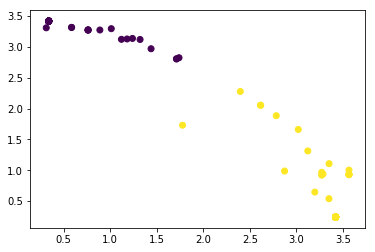

In [29]:
import matplotlib.pyplot as plt
plt.scatter(x=senator_distance[:,0],y=senator_distance[:,1],c=labels)
plt.show()

In [30]:
extremist=[3.4,.24]
moderate=[2.6,2]
print(3.4**3+.24**3)
print(2.6**3+2**3)

39.317823999999995
25.576


In [31]:
extremism=(senator_distance**3).sum(axis=1)
votes['extremism']=extremism
votes.sort_values('extremism',inplace=True,ascending=False)
print(votes.head())

        name party state  00001  00004  00005  00006  00007  00008  00009  \
98    Wicker     R    MS    0.0    1.0    1.0    1.0    1.0    0.0    1.0   
53  Lankford     R    OK    0.0    1.0    1.0    0.0    1.0    0.0    1.0   
69      Paul     R    KY    0.0    1.0    1.0    0.0    1.0    0.0    1.0   
80     Sasse     R    NE    0.0    1.0    1.0    0.0    1.0    0.0    1.0   
26      Cruz     R    TX    0.0    1.0    1.0    0.0    1.0    0.0    1.0   

    00010  00020  00026  00032  00038  00039  00044  00047  extremism  
98    0.0    1.0    1.0    0.0    0.0    1.0    0.0    0.0  46.250476  
53    1.0    1.0    1.0    0.0    0.0    1.0    0.0    0.0  46.046873  
69    1.0    1.0    1.0    0.0    0.0    1.0    0.0    0.0  46.046873  
80    1.0    1.0    1.0    0.0    0.0    1.0    0.0    0.0  46.046873  
26    1.0    1.0    1.0    0.0    0.0    1.0    0.0    0.0  46.046873  
